In [1]:
%matplotlib inline

In [2]:
from vizztf import ZTFSNViz

In [3]:
from sqlalchemy import create_engine

In [4]:
import pandas as pd
import numpy as np

In [5]:
import sncosmo
import logging
logger = logging.getLogger('ztf')
logger.setLevel(logging.INFO)
#logging.basicConfig(level=logging.DEBUG, filename='images_test.log')

In [6]:
# Read cadences:
def read_cadence(fname='/Users/rbiswas/Downloads/test_schedule_v3.db'):
    """read the output of a observing strategy simulation into a dataframe
    
    Paramameters
    ------------
    fname : str, optional
        absolute path to the observing stratgy simulation
    """
    fname = 'sqlite:///' + fname
    engine = create_engine(fname)
    df = pd.read_sql_table('Summary', con=engine)
    df.obsHistID = df.obsHistID.astype(np.int)
    df.set_index('obsHistID', inplace=True)
    df.expMJD = df.expMJD + 365 * 2 # ZTF is not done
    return df

In [7]:
def read_sim(fname='/Users/rbiswas/Downloads/sn_coord_time.dat'):
    df = pd.read_csv(fname,
                     skiprows=1, delim_whitespace=True,
                     names=('z', 'ra', 'dec', 't0'))
    #df.ra = df.ra * 360./24.0 - 180.
    df.t0 = df.t0 - 2400000.5
    return df
#df.groupby(['night']).sessionID.count().hist(histtype='step')
simsdf = read_sim()

In [8]:
simsdf.head()

,z,ra,dec,t0
0,0.150856,177.009298,-9.541729,58158.737911
1,0.193961,-142.895644,-16.445698,58171.555313
2,0.185266,104.668543,5.147820,58304.201365
3,0.101136,93.239688,81.126166,58232.383343
4,0.137615,39.767127,0.367004,58192.249369


In [9]:
df = read_cadence()

# Check that it uses the simulation and can Generate an image correctly

In [10]:
ztfsky = ZTFSNViz(showVisibleFields=True, showVarScatter=True, showMW=True,
                  data_dir='/Users/rbiswas/doc/projects/ZTF/data_year/')

In [11]:
ztfsky.show_var_scatter

True

In [12]:
ztfsky.colorCodeRedshifts

True

In [13]:
simdata = ztfsky.generate_var_scatter(58192.23, 'g', simsdf)

/Users/rbiswas/.local/lib/python2.7/site-packages/sncosmo-1.6.dev0-py2.7-macosx-10.6-x86_64.egg/sncosmo/models.py:187: RuntimeWarning: divide by zero encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)
/Users/rbiswas/.local/lib/python2.7/site-packages/vizztf-0.0.2-py2.7.egg/vizztf/ztf.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  simsdf['mag'] = mag
/Users/rbiswas/.local/lib/python2.7/site-packages/vizztf-0.0.2-py2.7.egg/vizztf/ztf.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  simsdf['x0'] = x0
/Users/rbiswas/.local/

In [14]:
simdata.head()

,z,ra,dec,t0,time,mag,x0,area
0,0.150856,177.009298,-9.541729,58158.737911,33.492089,22.667118,0.000152,0.469640
1,0.193961,-142.895644,-16.445698,58171.555313,20.674687,22.339334,0.000087,0.338315
4,0.137615,39.767127,0.367004,58192.249369,-0.019369,19.773143,0.000186,0.052832
6,0.079323,145.126368,15.086576,58173.736473,18.493527,19.853502,0.000603,0.041796
11,0.187521,61.018721,44.505067,58204.929374,-12.699374,21.640655,0.000094,0.130109


### Check generating a single image works

/usr/local/miniconda/lib/python2.7/site-packages/matplotlib/patches.py:107: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


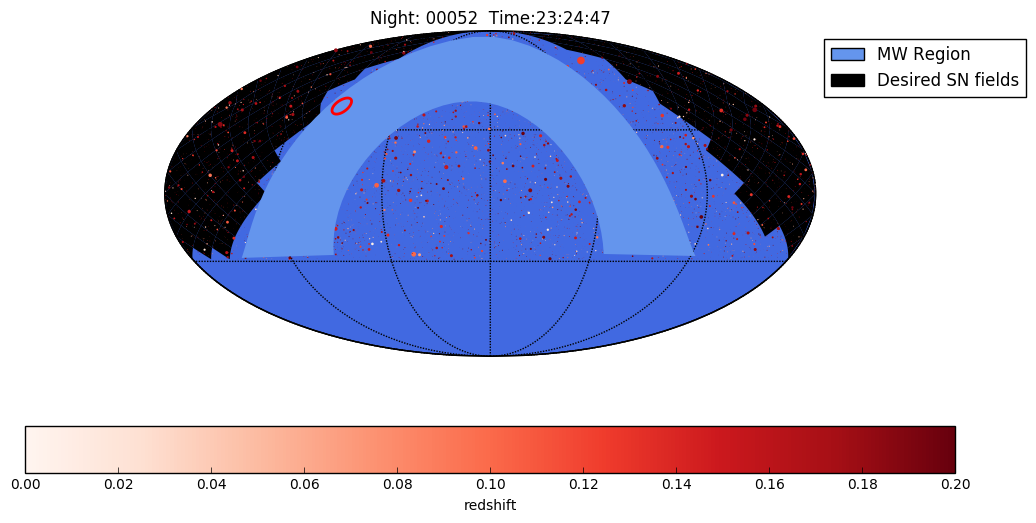

In [17]:
ra, dec, mjd, band = df.loc[30000, ['fieldRA', 'fieldDec', 'expMJD', 'filter']]
fig, ax, m, xx = ztfsky.generate_image(np.degrees(ra), np.degrees(dec), 4., 
                                mjd, band=band, mwColor='cornflowerblue',
                                alpha=1.0,
                                sndf=simsdf, bg_color='royalblue',
                                surveystart=df.expMJD.min(),
                                loc='best')

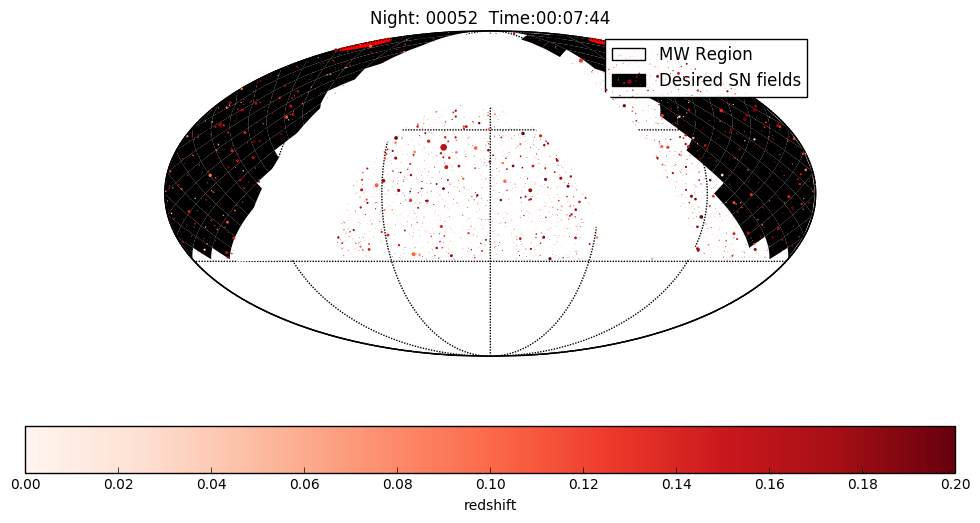

In [16]:
ra, dec, mjd, band = df.loc[30028, ['fieldRA', 'fieldDec', 'expMJD', 'filter']]
fig, ax, m, xx = ztfsky.generate_image(np.degrees(ra), np.degrees(dec), 4., 
                                mjd, band=band, mwColor='w', mwEdgeColor='k',
                                mwLw=5, vfcolor='k', alpha=1.,                           
                                sndf=simsdf, bg_color='w', 
                                surveystart=df.expMJD.min())



In [17]:
fig.savefig('colorcoded.png')

## Generate Multiple images conveniently

In [18]:
import logging
logging.basicConfig(filename='multiImage.log', level=logging.INFO)

In [19]:
!rm ztf_obsHistID_03*.png 

In [20]:
import matplotlib.pyplot as plt

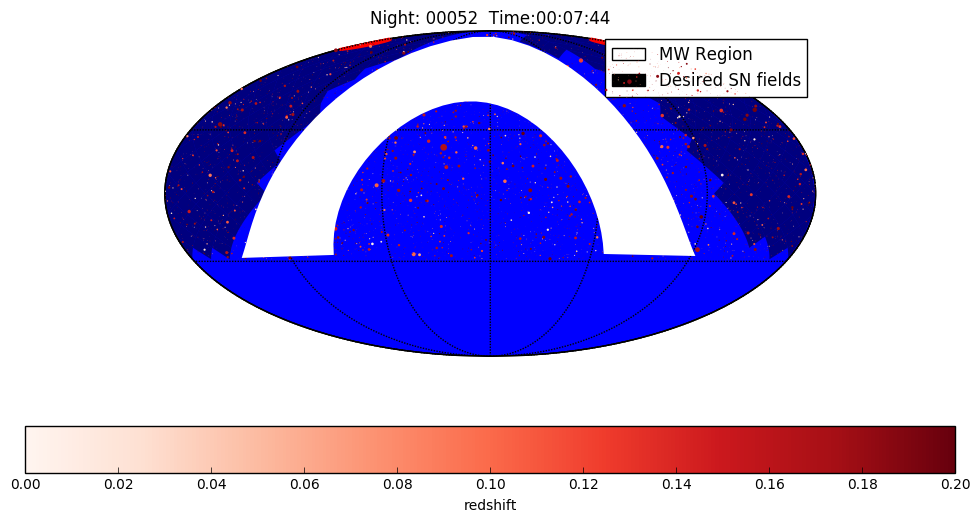

In [21]:
_ = ztfsky.generate_image(ra=np.degrees(ra), dec=np.degrees(dec),
                          radius_deg=4., mjd=mjd,
                          band=band, 
                          sndf=simsdf, cmap=plt.cm.Reds,
                          bg_color='b',
                          vfcolor='k',
                          mwFill=True, mwColor='w', mwAlpha=1.0, mwLw=0.,
                          surveystart=df.expMJD.min())

In [ ]:
ztfsky.generate_images_from(df.loc[30000:300020].index.values, df, 
                            snsims=simsdf, savefig=True)

/usr/local/miniconda/lib/python2.7/site-packages/matplotlib/patches.py:107: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


In [23]:
!ls -ltr

total 7728
-rw-r--r--@ 1 rbiswas  staff   85895 Nov 10 12:55 day_1.png
-rw-r--r--@ 1 rbiswas  staff  109050 Nov 10 12:55 day_16.png
-rw-r--r--@ 1 rbiswas  staff  113183 Nov 11 17:01 ztf_obsHistID_000001.png
-rw-r--r--  1 rbiswas  staff  113017 Nov 11 17:02 ztf_obsHistID_000002.png
-rw-r--r--  1 rbiswas  staff  112706 Nov 11 17:02 ztf_obsHistID_000003.png
-rw-r--r--  1 rbiswas  staff  112495 Nov 11 17:02 ztf_obsHistID_000004.png
-rw-r--r--  1 rbiswas  staff    5555 Nov 12 22:15 Untitled.ipynb
-rw-r--r--  1 rbiswas  staff   99419 Nov 13 13:59 Demo_ztf_visibleFields.ipynb
-rw-r--r--  1 rbiswas  staff  367158 Nov 13 13:59 Demo_ztf_camera.ipynb
-rw-r--r--  1 rbiswas  staff  311771 Nov 13 13:59 Demo_testMW.ipynb
-rw-r--r--@ 1 rbiswas  staff  134085 Nov 13 14:11 colorcoded.png
-rw-r--r--  1 rbiswas  staff  147883 Nov 13 14:12 ztf_obsHistID_030000.png
-rw-r--r--  1 rbiswas  staff  147977 Nov 13 14:12 ztf_obsHistID_030001.png
-rw-r--r--  1 rbiswas  staff  542591 Nov 13 14:13 Demo_ztf_sn_scatter

In [ ]:
!open ztf_obsHistID_030000.png

# Scratch

In [ ]:
ztfsky = ZTFSNViz(showMW=False)
fig, ax, m = ztfsky.generate_image_bg(mwfill=False, lw=5., mwcolor='k')

In [ ]:
ra = [-30, 30, 30, -30]
dec = [-30, -30, 30, 30]
x, y = m(ra, dec)

In [ ]:
from matplotlib.patches import Polygon

In [ ]:
p = Polygon(zip(x,y), fill=False, color='k', alpha=1.,
            **dict(edgecolor='w', lw=5))

In [ ]:
ax.add_patch(p)

In [ ]:
p.get_lw()

In [ ]:
fig